# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/time-series-exercises'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
from utils.tidy import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Drones over here...

Thank Madeleine:  
os.getcwd()

In [2]:
df=tidy_btcusd()

cached csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   open_time                  1000 non-null   int64  
 1   open                       1000 non-null   float64
 2   high                       1000 non-null   float64
 3   low                        1000 non-null   float64
 4   close                      1000 non-null   float64
 5   volume                     1000 non-null   float64
 6   close_time                 1000 non-null   int64  
 7   quote_asset                1000 non-null   float64
 8   number_of_trades           1000 non-null   int64  
 9   taker_buy_base_asset_vol   1000 non-null   float64
 10  taker_buy_quote_asset_vol  1000 non-null   float64
 11  ignore                     1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [4]:
train = df.loc[:599] 
validate =df.loc[600:799] 
test = df.loc[800:999]
train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   open_time                  600 non-null    int64  
 1   open                       600 non-null    float64
 2   high                       600 non-null    float64
 3   low                        600 non-null    float64
 4   close                      600 non-null    float64
 5   volume                     600 non-null    float64
 6   close_time                 600 non-null    int64  
 7   quote_asset                600 non-null    float64
 8   number_of_trades           600 non-null    int64  
 9   taker_buy_base_asset_vol   600 non-null    float64
 10  taker_buy_quote_asset_vol  600 non-null    float64
 11  ignore                     600 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 56.4 KB


In [5]:
train.head()

,open_time,open,high,low,close,volume,close_time,quote_asset,number_of_trades,taker_buy_base_asset_vol,taker_buy_quote_asset_vol,ignore
0,1650857640000,39241.39,39247.11,39241.03,39241.03,0.034305,1650857699999,1346.2987,5,0.032395,1271.3484,0
1,1650857700000,39239.88,39272.32,39239.88,39246.41,2.441750,1650857759999,95844.1921,65,1.473456,57836.1693,0
2,1650857760000,39245.53,39249.18,39230.06,39232.18,0.103794,1650857819999,4072.9587,24,0.052915,2076.4194,0
3,1650857820000,39233.21,39238.46,39232.93,39232.93,0.019871,1650857879999,779.6247,8,0.007287,285.9047,0
4,1650857880000,39232.49,39248.38,39232.20,39238.10,0.056483,1650857939999,2216.3283,13,0.048939,1920.2979,0


Column: open_time


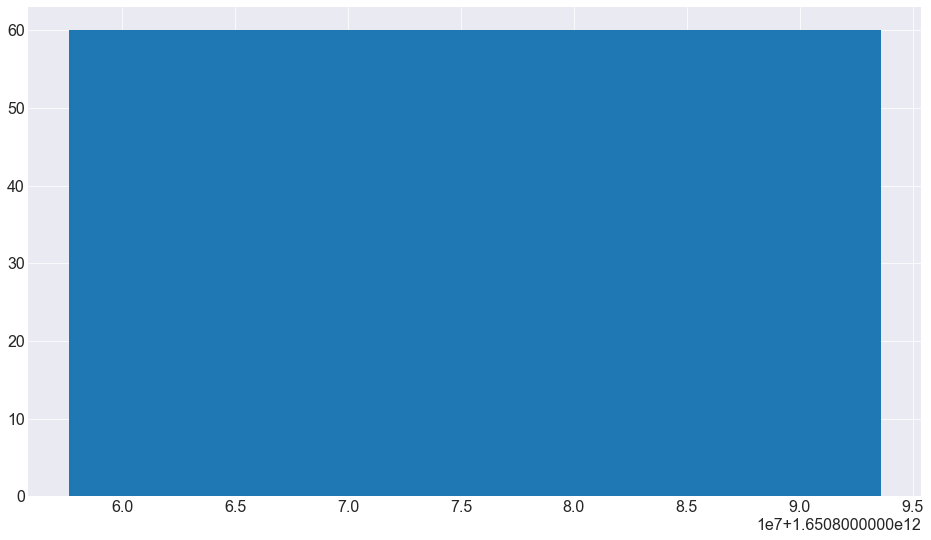

Column: open


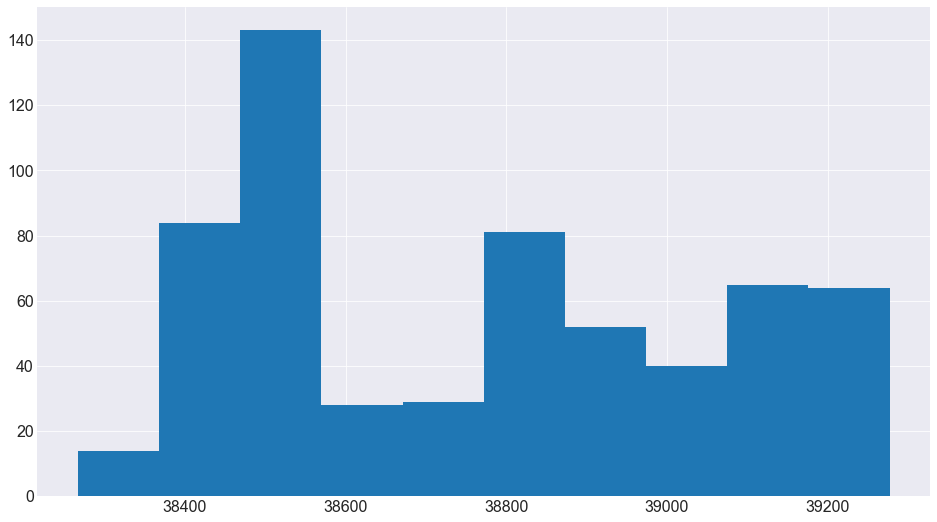

Column: high


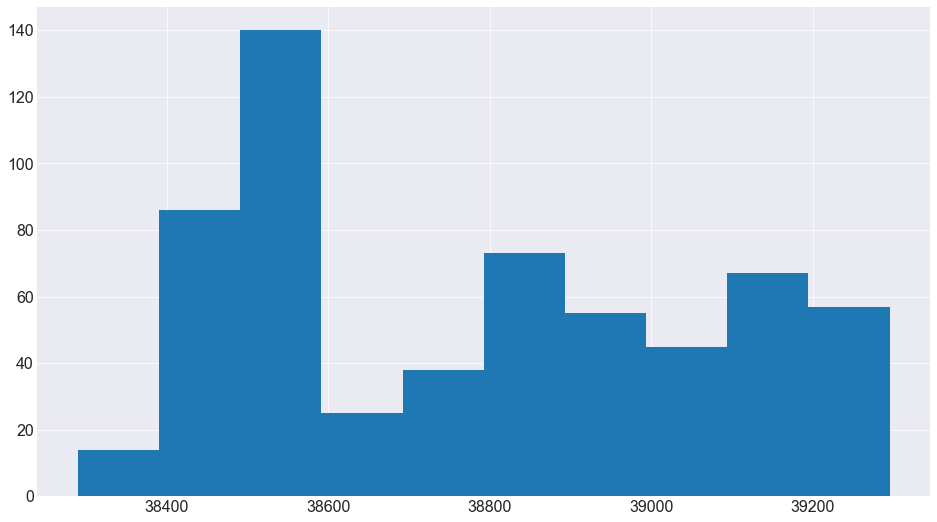

Column: low


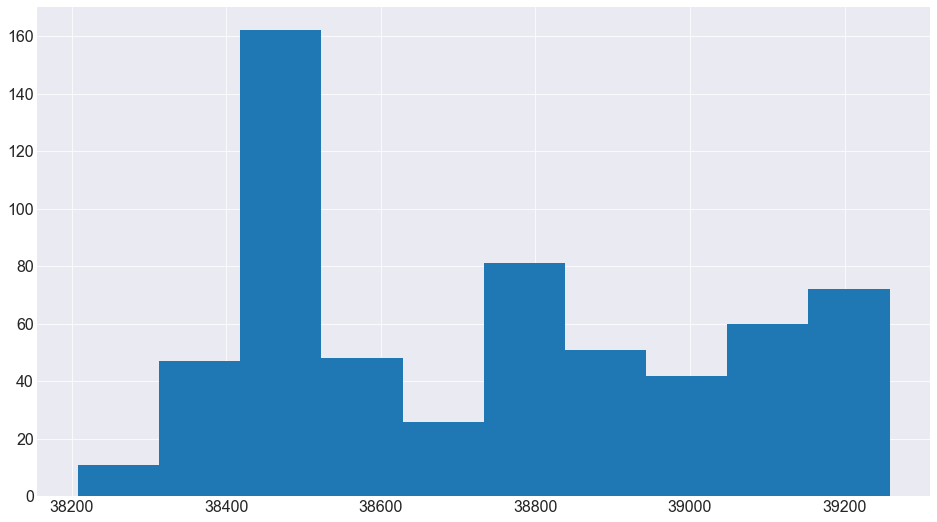

Column: close


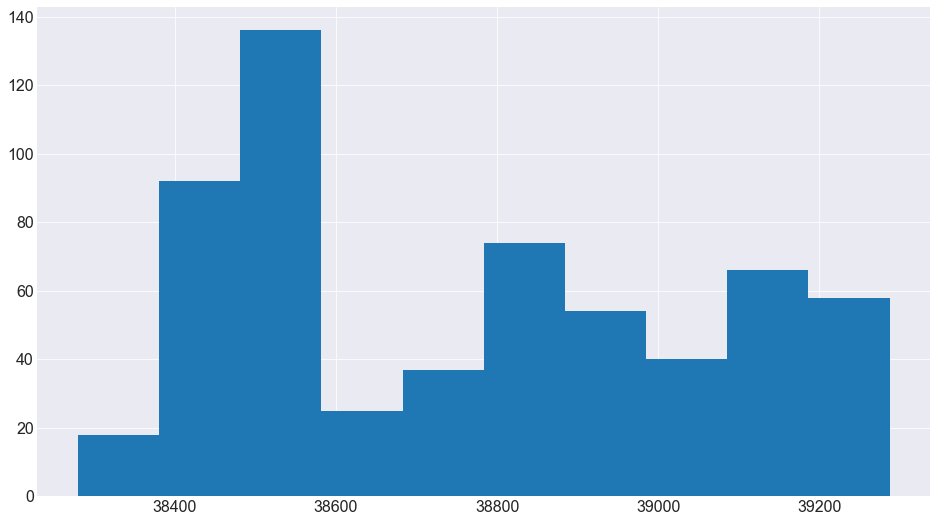

Column: volume


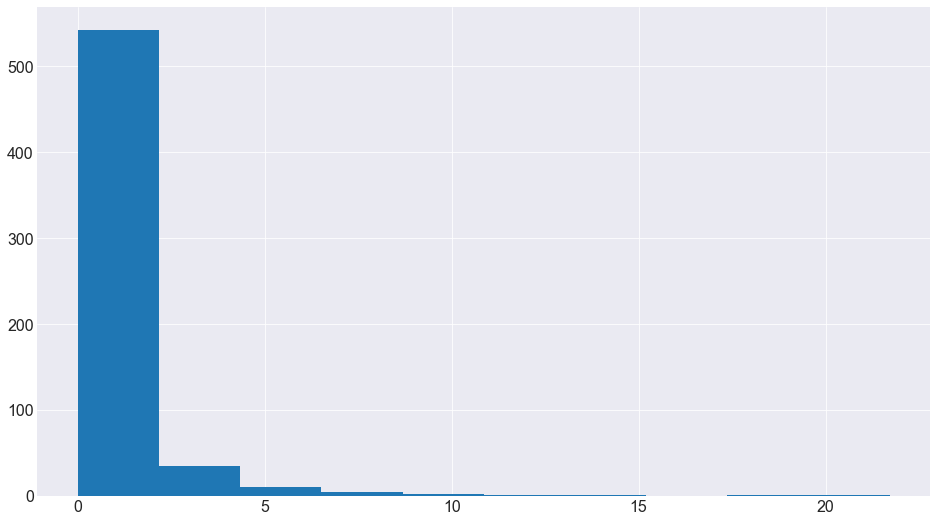

Column: close_time


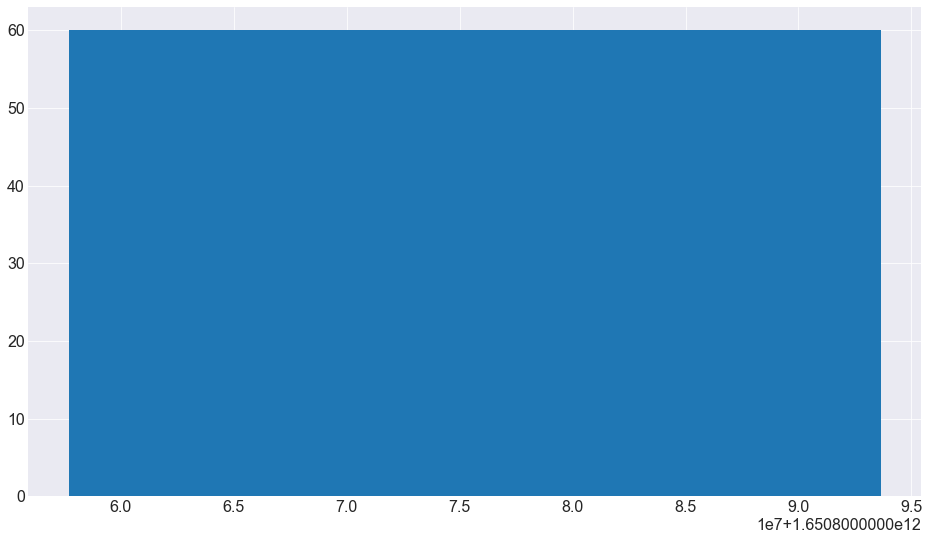

Column: quote_asset


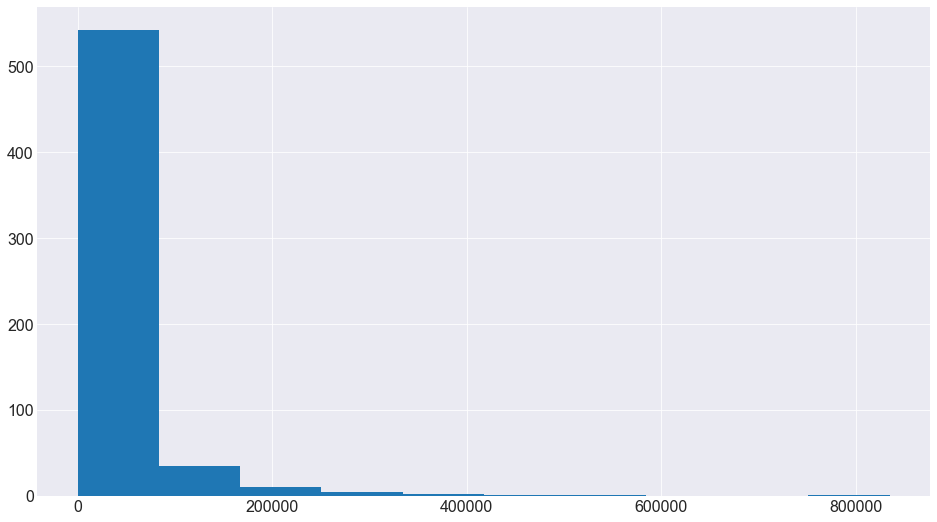

Column: number_of_trades


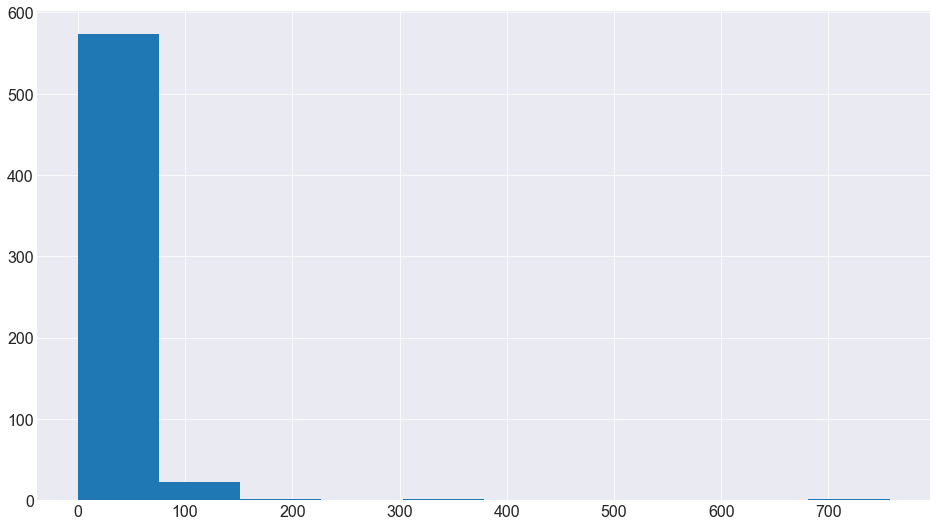

Column: taker_buy_base_asset_vol


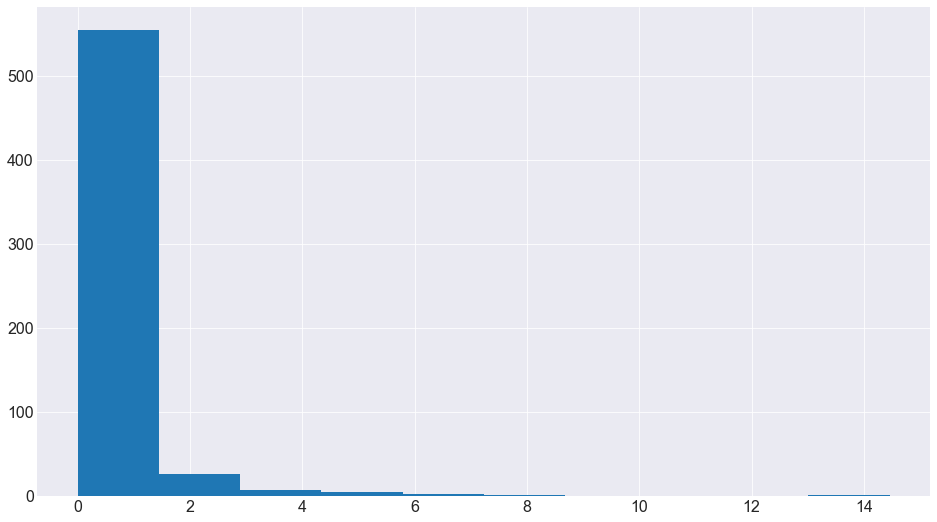

Column: taker_buy_quote_asset_vol


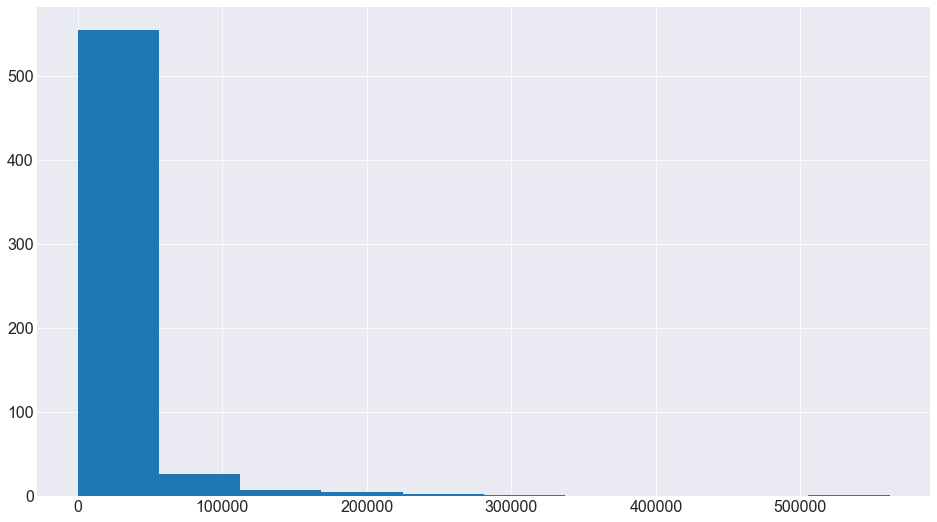

Column: ignore


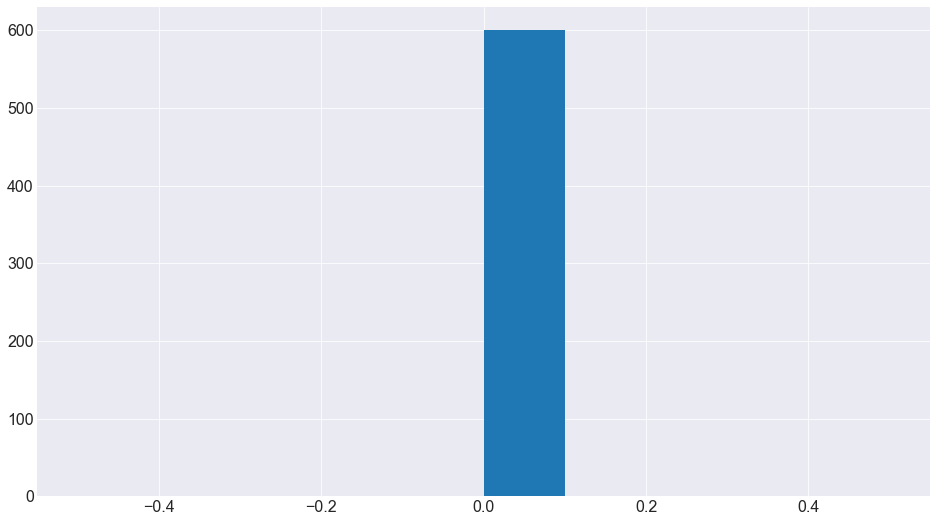

In [6]:
# univariate analysis of columns:
for col in train.columns:
    print('Column: ' + col)
    plt.hist(train[col])
    plt.show()

# close
I'm looking at `close`.

Trying to put it over time.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   open_time                  600 non-null    int64  
 1   open                       600 non-null    float64
 2   high                       600 non-null    float64
 3   low                        600 non-null    float64
 4   close                      600 non-null    float64
 5   volume                     600 non-null    float64
 6   close_time                 600 non-null    int64  
 7   quote_asset                600 non-null    float64
 8   number_of_trades           600 non-null    int64  
 9   taker_buy_base_asset_vol   600 non-null    float64
 10  taker_buy_quote_asset_vol  600 non-null    float64
 11  ignore                     600 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 56.4 KB


In [8]:
# train['close_time'] = train['close_time'].astype(str).str[:-3].astype(np.int64)

In [9]:
train.close_time=pd.to_datetime(train.close_time, unit='ms')

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_8568/3524989098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.close_time=pd.to_datetime(train.close_time, unit='ms')


In [10]:
train.close_time.head()

0   2022-04-25 03:34:59.999
1   2022-04-25 03:35:59.999
2   2022-04-25 03:36:59.999
3   2022-04-25 03:37:59.999
4   2022-04-25 03:38:59.999
Name: close_time, dtype: datetime64[ns]

In [11]:
train=train.set_index('close_time').sort_index()

In [12]:
train.index

DatetimeIndex(['2022-04-25 03:34:59.999000', '2022-04-25 03:35:59.999000',
               '2022-04-25 03:36:59.999000', '2022-04-25 03:37:59.999000',
               '2022-04-25 03:38:59.999000', '2022-04-25 03:39:59.999000',
               '2022-04-25 03:40:59.999000', '2022-04-25 03:41:59.999000',
               '2022-04-25 03:42:59.999000', '2022-04-25 03:43:59.999000',
               ...
               '2022-04-25 13:24:59.999000', '2022-04-25 13:25:59.999000',
               '2022-04-25 13:26:59.999000', '2022-04-25 13:27:59.999000',
               '2022-04-25 13:28:59.999000', '2022-04-25 13:29:59.999000',
               '2022-04-25 13:30:59.999000', '2022-04-25 13:31:59.999000',
               '2022-04-25 13:32:59.999000', '2022-04-25 13:33:59.999000'],
              dtype='datetime64[ns]', name='close_time', length=600, freq=None)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2022-04-25 03:34:59.999000 to 2022-04-25 13:33:59.999000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   open_time                  600 non-null    int64  
 1   open                       600 non-null    float64
 2   high                       600 non-null    float64
 3   low                        600 non-null    float64
 4   close                      600 non-null    float64
 5   volume                     600 non-null    float64
 6   quote_asset                600 non-null    float64
 7   number_of_trades           600 non-null    int64  
 8   taker_buy_base_asset_vol   600 non-null    float64
 9   taker_buy_quote_asset_vol  600 non-null    float64
 10  ignore                     600 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 56.2 KB


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


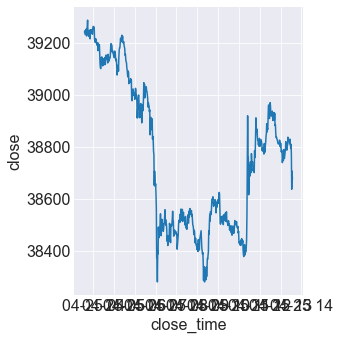

In [14]:

sns.relplot(train.index,train.close,kind='line')

# EDA

This graph show the close price histogram. It shows the average prices where the graphs are highest. Interestingly, these three distinct peaks may be used as buy/sell indicators.

If the first peak was your in, then the second peak may not satisfy your spread, which would set the price point at the next peak, the one farthest to the right of the graph.

This graph represents aprox. 17hrs of 1m candlesticks from binance; pair: btcusd.


<AxesSubplot:ylabel='Frequency'>

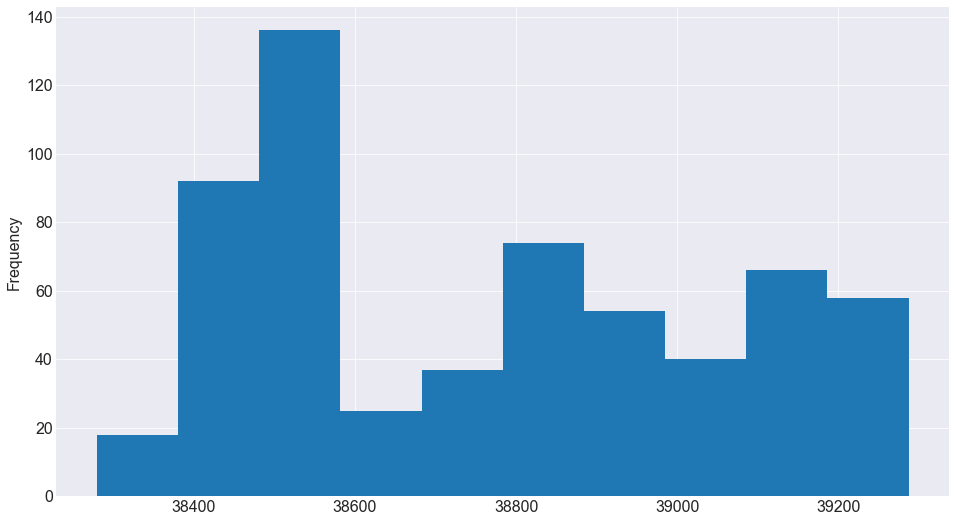

In [15]:
train.close.plot.hist()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='close'>

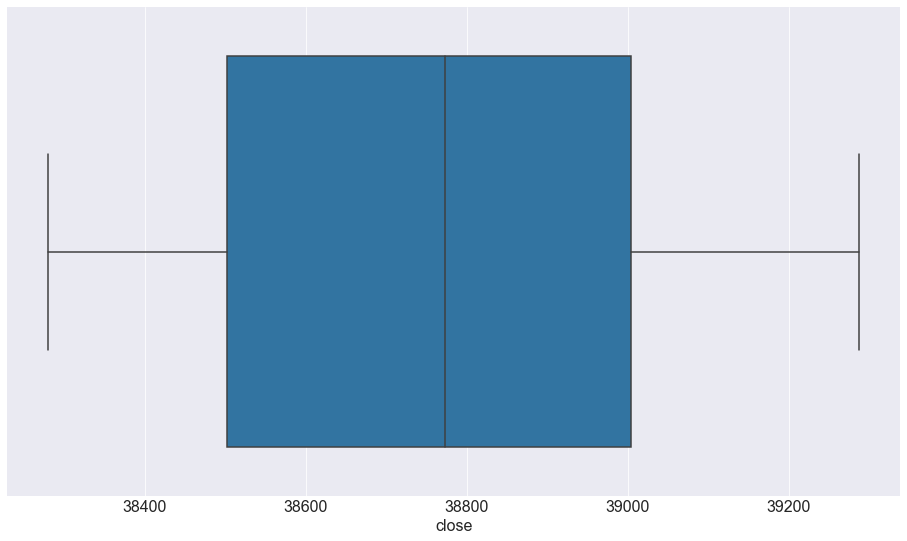

In [16]:
sns.boxplot(train.close)

<AxesSubplot:xlabel='close_time'>

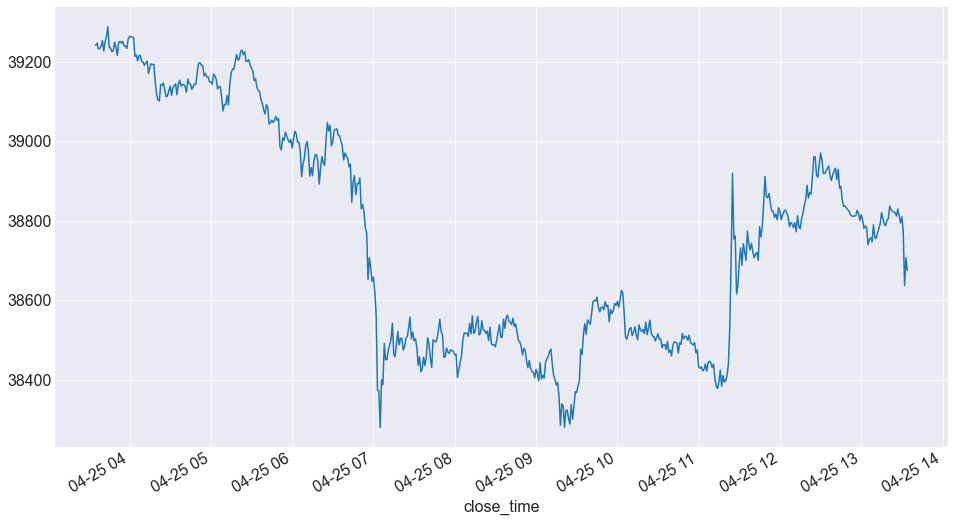

In [17]:
train.close.plot()


<AxesSubplot:title={'center':'1 hour average'}, xlabel='close_time'>

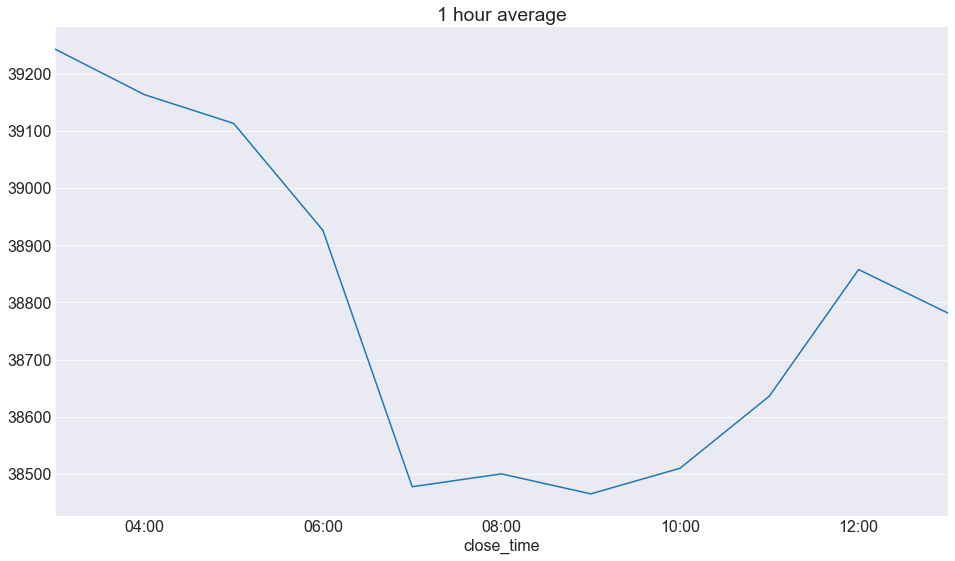

In [18]:
train.close.resample('H').mean().plot(title='1 hour average')

<AxesSubplot:title={'center':'30 min average'}, xlabel='close_time'>

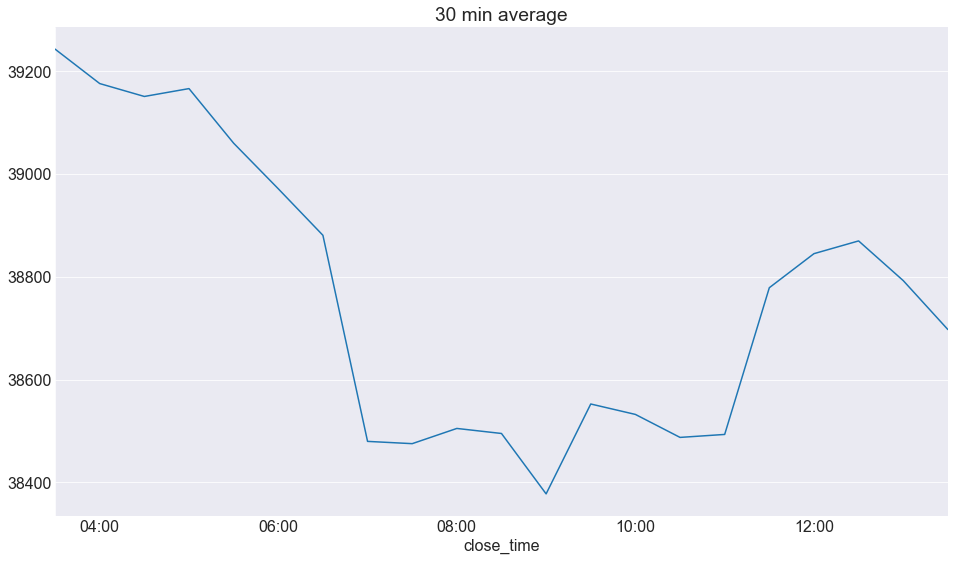

In [19]:
train.close.resample('30min').mean().plot(title='30 min average')

<AxesSubplot:title={'center':'15 min average'}, xlabel='close_time'>

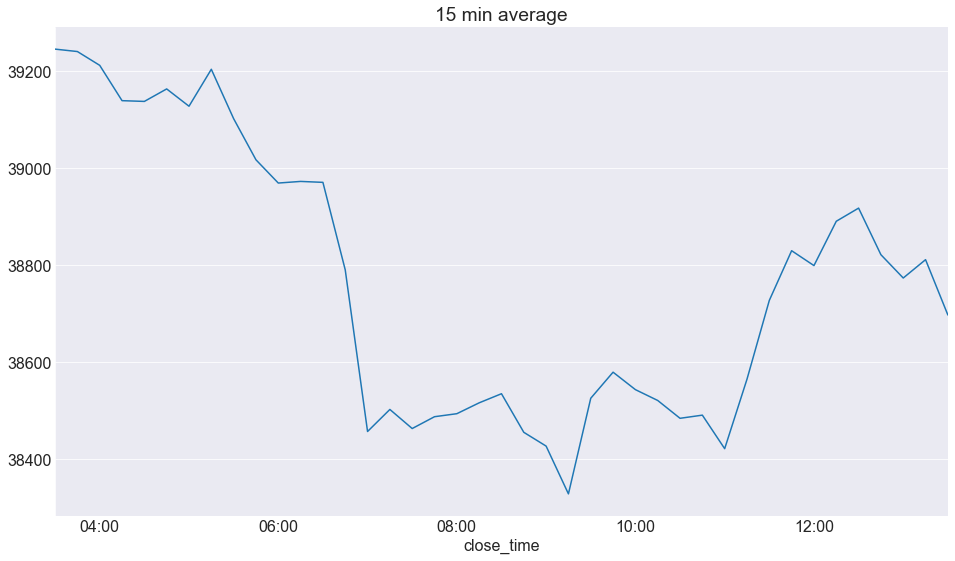

In [20]:
train.close.resample('15min').mean().plot(title='15 min average')

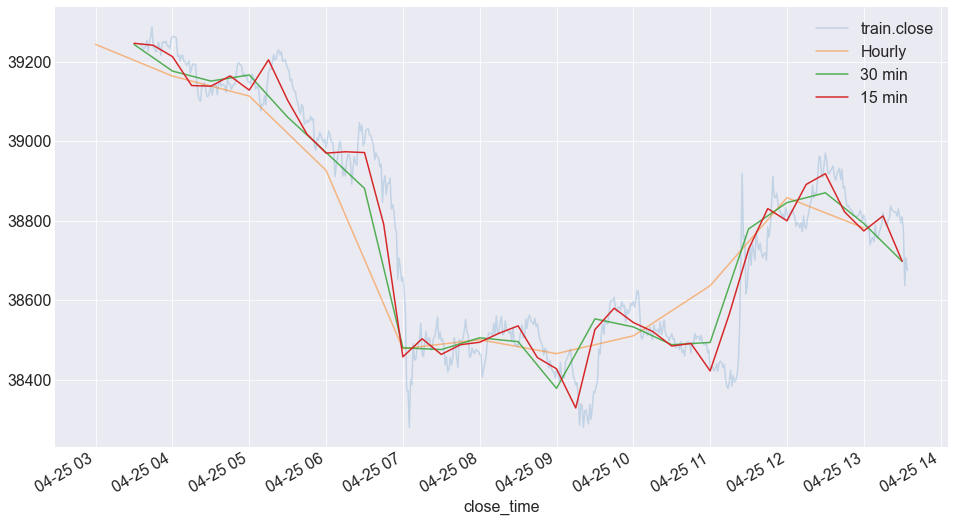

In [21]:
train.close.plot(alpha=.2, label='train.close')
train.close.resample('H').mean().plot(alpha=.5, label='Hourly')
train.close.resample('30min').mean().plot(alpha=.8, label='30 min')
train.close.resample('15min').mean().plot(label='15 min')
plt.legend()


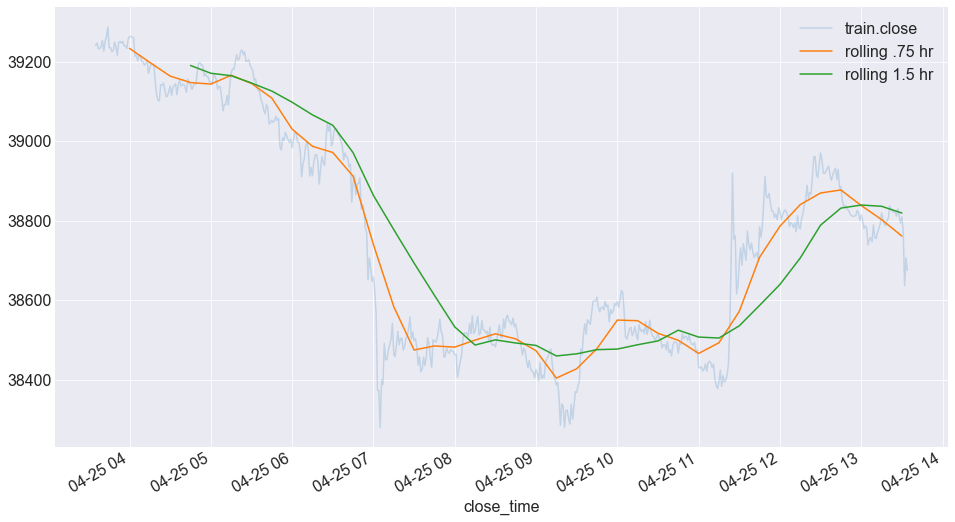

In [22]:
train.close.plot(alpha=.2, label='train.close')
# train.close.resample('H').mean().plot(alpha=.5, label='Hourly')
# train.close.resample('30min').mean().plot(alpha=.8, label='30 min')
train.close.resample('15min').mean().rolling(3).mean().plot(label='rolling .75 hr')
train.close.resample('15min').mean().rolling(6).mean().plot(label='rolling 1.5 hr')
plt.legend()


In [23]:
sp=train.close.resample('15min').mean().diff() #.plot(title='change')


Text(0.5, 1.0, 'change in close price over 15 min intervals')

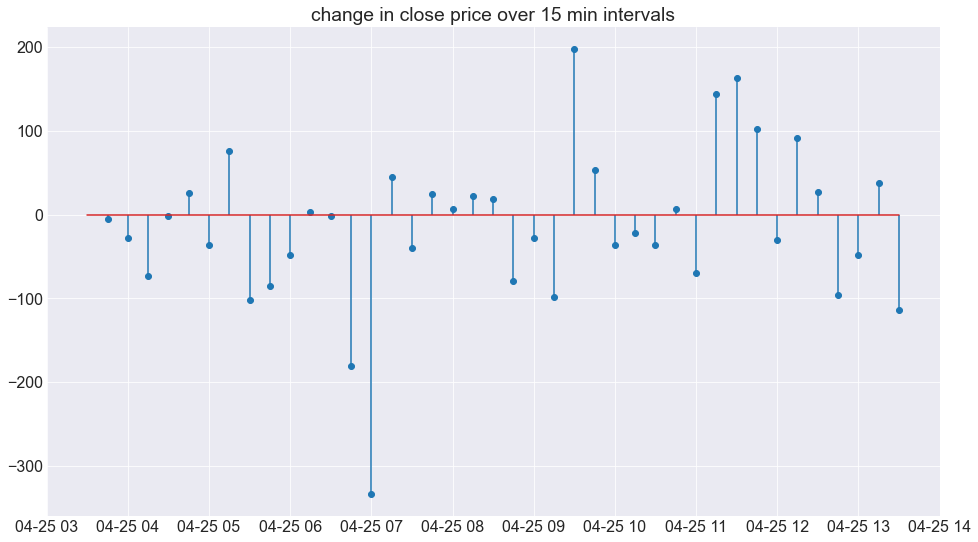

In [24]:
plt.stem(sp.index,sp,use_line_collection=True)
plt.title('change in close price over 15 min intervals')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='close_time'>

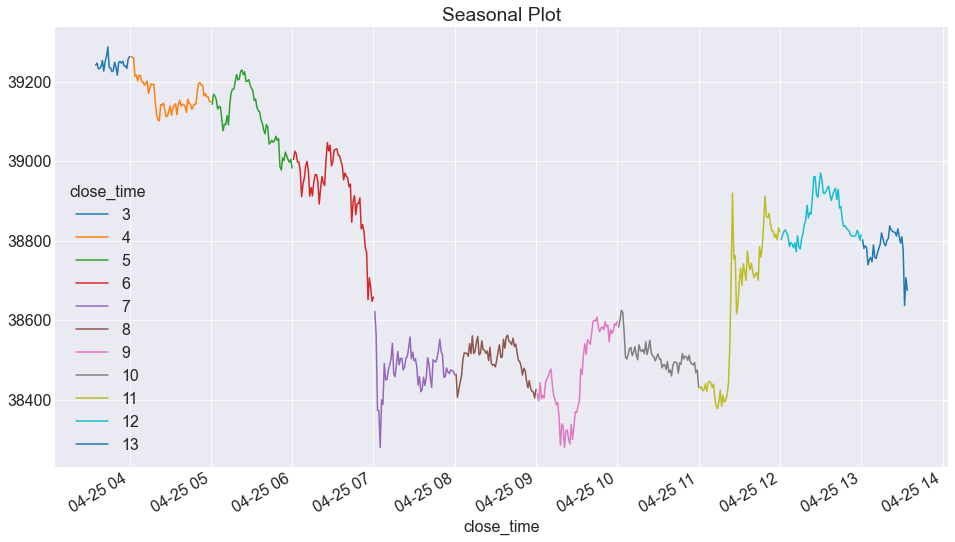

In [25]:
train.close.groupby([train.index.hour, train.index]).mean().unstack(0).plot(title='Seasonal Plot')

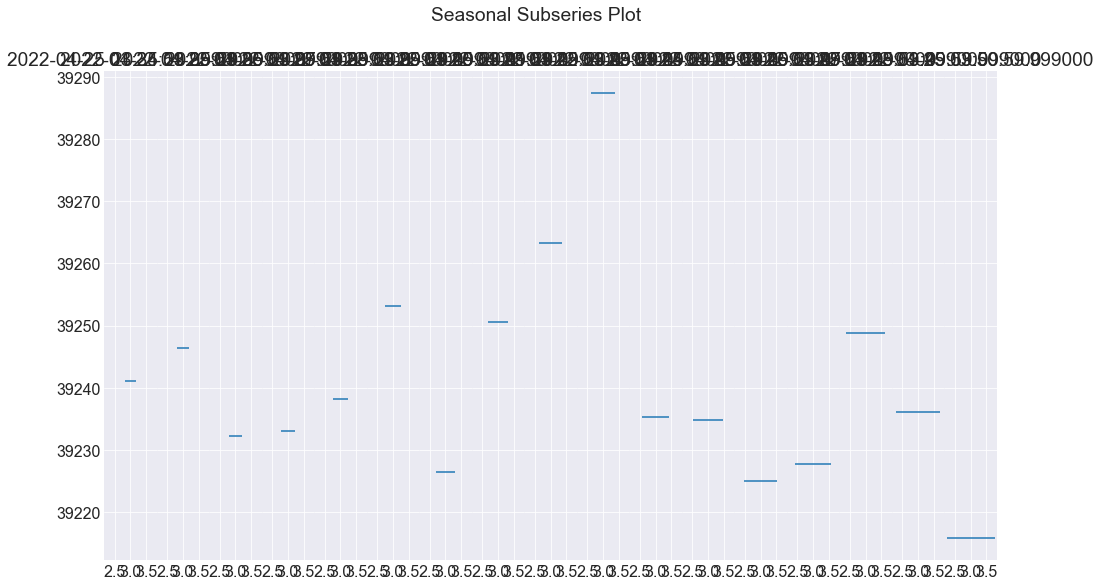

In [26]:
table = train.close.groupby([train.close.index.hour, train.close.index]).mean().unstack()

fig, axs = plt.subplots(1, 17, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


Text(0.5, 1.0, 'Lag plot with lag=1')

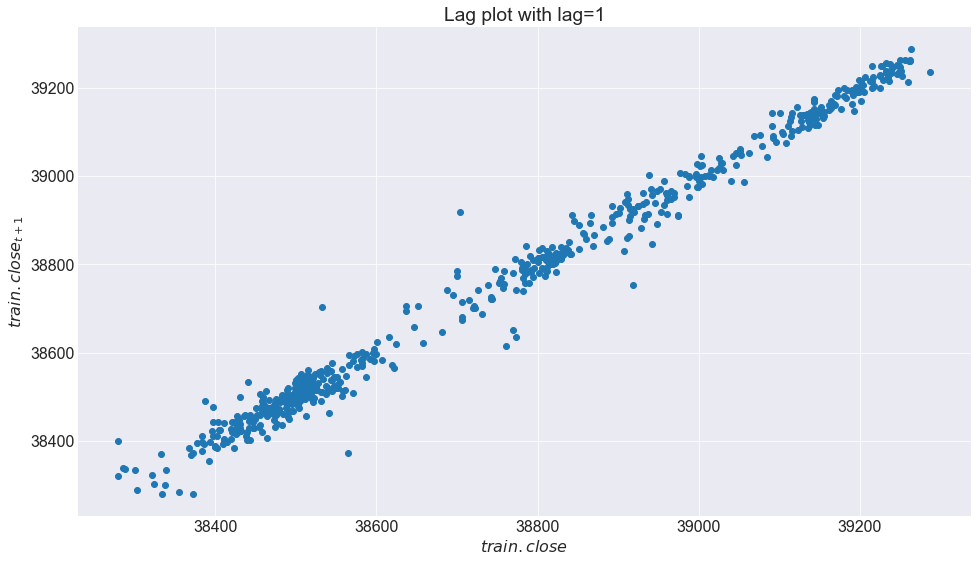

In [27]:
plt.scatter(train.close, train.close.shift(-1))
plt.xlabel('$train.close$')
plt.ylabel('$train.close_{t + 1}$')
plt.title('Lag plot with lag=1')


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

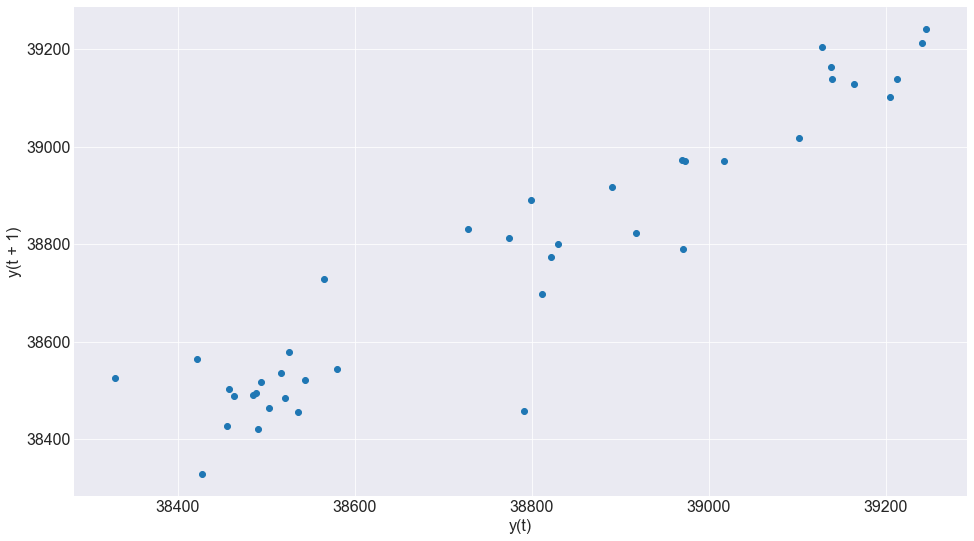

In [28]:
pd.plotting.lag_plot(train.close.resample('15 min').mean(), lag=1)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

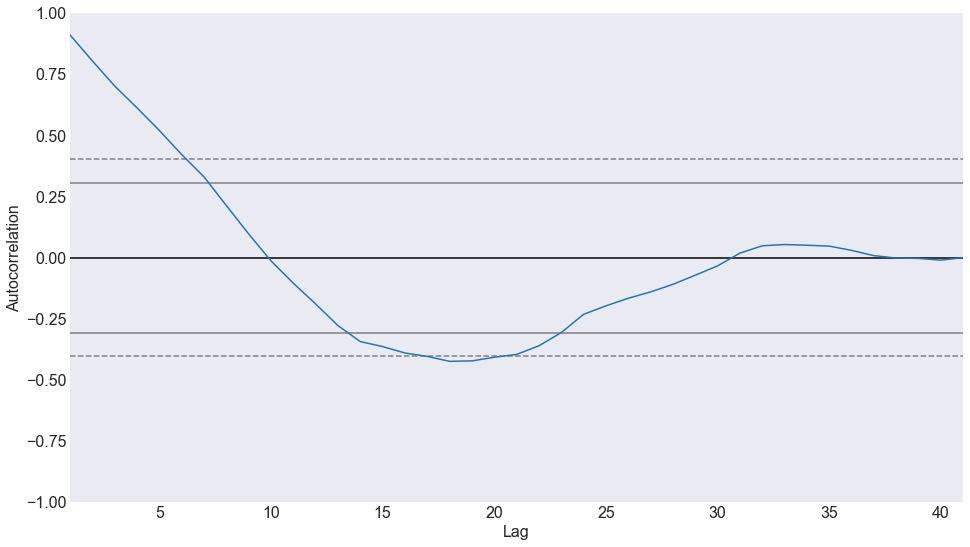

In [29]:
pd.plotting.autocorrelation_plot(train.close.resample('15min').mean())


In [30]:
y = train.close.resample('15min').mean()


In [31]:

result = sm.tsa.seasonal_decompose(y,period=4)


In [32]:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
close_time,,,,
2022-04-25 03:30:00,39246.066364,NaN,29.719312,NaN
2022-04-25 03:45:00,39241.062667,NaN,15.017719,NaN
2022-04-25 04:00:00,39212.592667,39196.370712,-37.623880,53.845835
2022-04-25 04:15:00,39139.711333,39173.240500,-7.113151,-26.416016
2022-04-25 04:30:00,39138.166000,39153.054833,29.719312,-44.608145


<AxesSubplot:xlabel='close_time'>

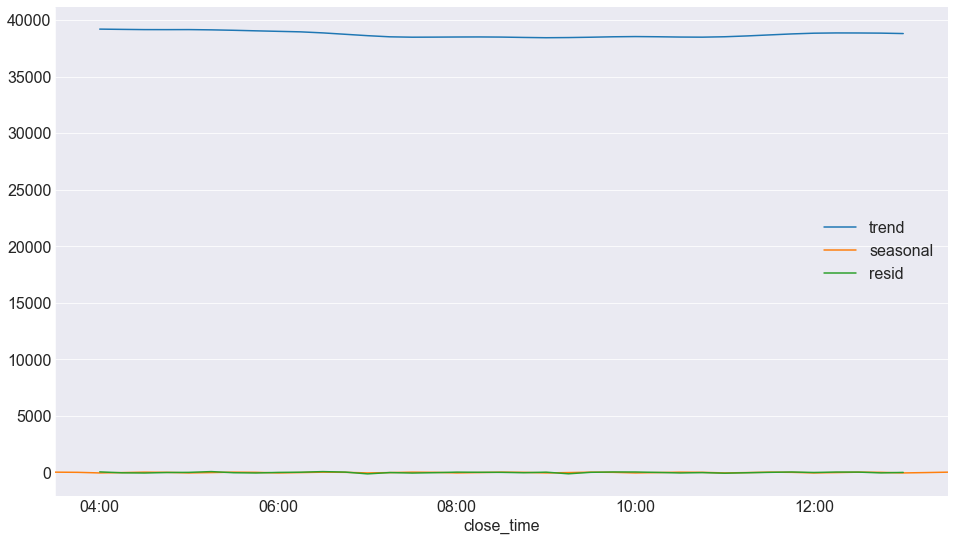

In [33]:
decomposition.iloc[:, 1:].plot()


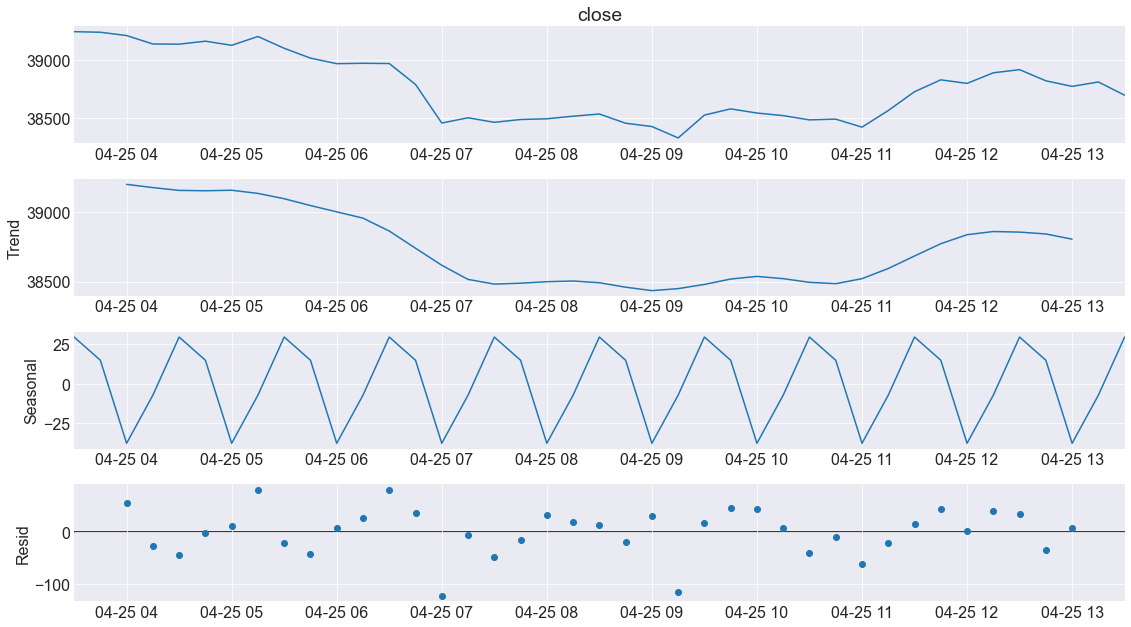

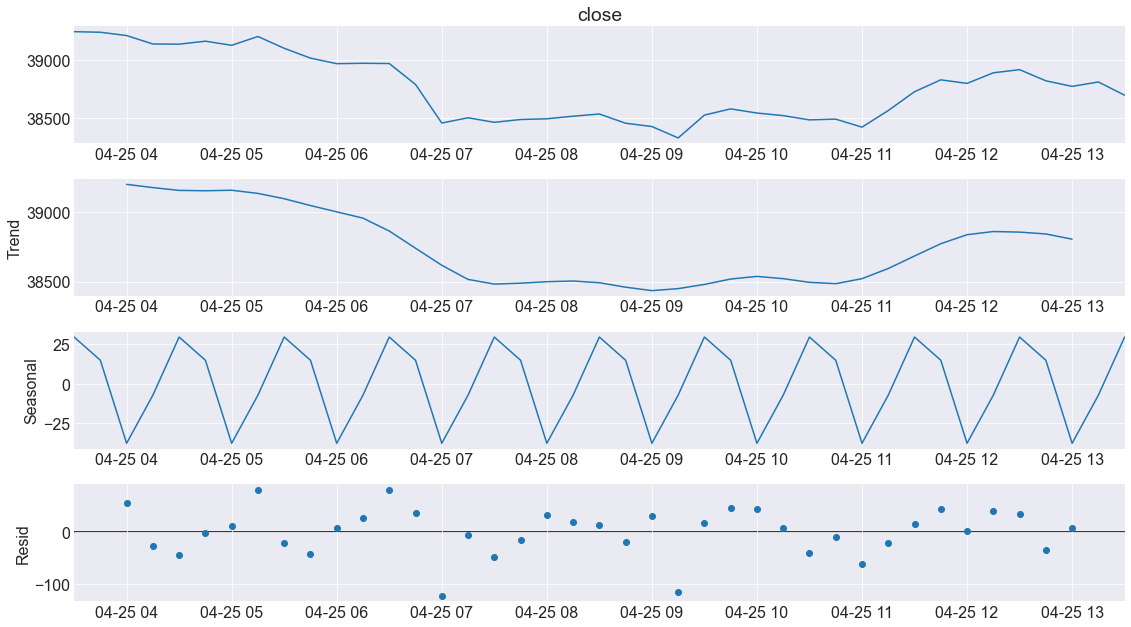

In [34]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()



Interesting: Prices were higher in the morning.

In [35]:
dff = train.close.resample('15min').mean()

dff=pd.DataFrame(dff)
# create a categorical feature
quarts= pd.qcut(dff.close, 3, labels=['small','med','large'])

quarts=pd.DataFrame(quarts)
quarts.columns=['spend_limit']
news=pd.concat([dff,quarts],axis=1)
news.groupby('spend_limit').mean()


,close
spend_limit,
small,38469.671714
med,38720.521449
large,39101.894264


Text(0, 0.5, 'average closing price, binned, %')

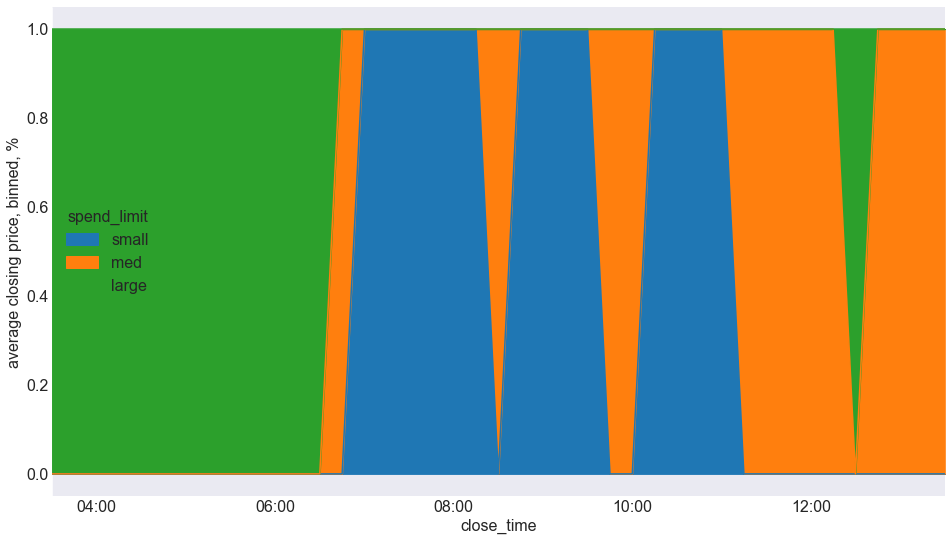

In [36]:
(news.groupby('spend_limit')
 .resample('15min')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('average closing price, binned, %')


In [37]:
news.head()

,close,spend_limit
close_time,,
2022-04-25 03:30:00,39246.066364,large
2022-04-25 03:45:00,39241.062667,large
2022-04-25 04:00:00,39212.592667,large
2022-04-25 04:15:00,39139.711333,large
2022-04-25 04:30:00,39138.166000,large


<AxesSubplot:xlabel='close_time'>

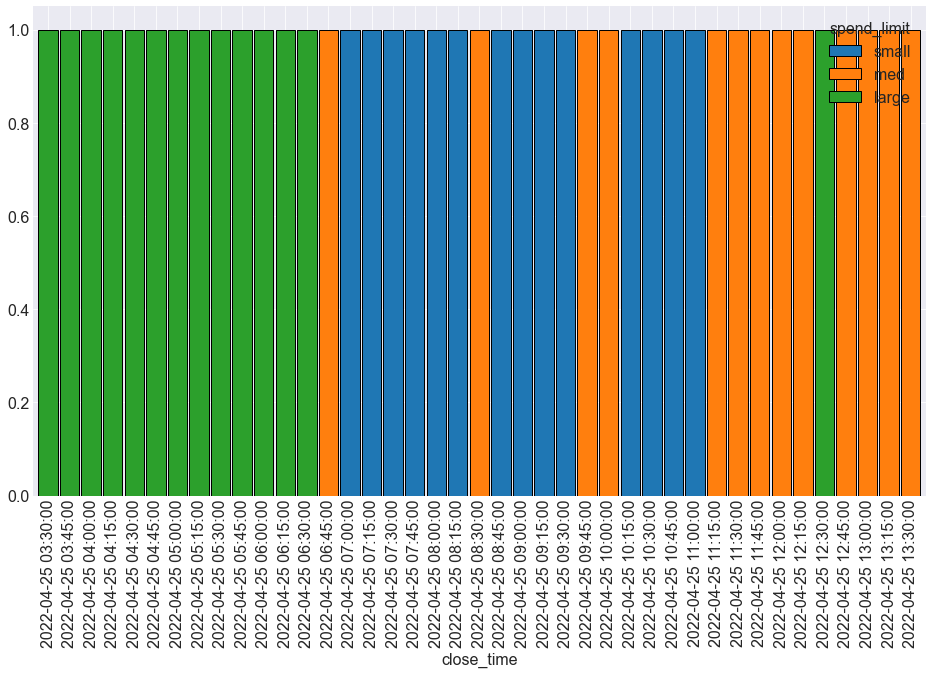

In [38]:
news.groupby('spend_limit').resample('15min').size().unstack(0).plot.bar(stacked=True, width=.9, ec='black')
	
